In [63]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
dropout_data = pd.read_csv('/kaggle/input/indian-school-education-statistics/dropout-ratio-2012-2015.csv')
enroll_data = pd.read_csv('/kaggle/input/indian-school-education-statistics/gross-enrollment-ratio-2013-2016.csv')
dropout_data.head()

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
0,A & N Islands,2012-13,0.83,0.51,0.68,Uppe_r_Primary,1.09,1.23,5.57,5.55,5.56,17.66,10.15,14.14
1,A & N Islands,2013-14,1.35,1.06,1.21,NR,1.54,0.51,8.36,5.98,7.2,18.94,12.2,15.87
2,A & N Islands,2014-15,0.47,0.55,0.51,1.44,1.95,1.69,11.47,8.16,9.87,21.05,12.21,16.93
3,Andhra Pradesh,2012-13,3.3,3.05,3.18,3.21,3.51,3.36,12.21,13.25,12.72,2.66,NR,0.35
4,Andhra Pradesh,2013-14,4.31,4.39,4.35,3.46,4.12,3.78,11.95,13.37,12.65,12.65,10.85,11.79


In [65]:
dropout_data.describe()

,State_UT,year,Primary_Boys,Primary_Girls,Primary_Total,Upper Primary_Boys,Upper Primary_Girls,Upper Primary_Total,Secondary _Boys,Secondary _Girls,Secondary _Total,HrSecondary_Boys,HrSecondary_Girls,HrSecondary_Total
count,110,110,110,110,110,110,110,110,110,110,110,110,110,110
unique,40,3,93,87,87,91,97,96,106,107,106,81,76,78
top,A & N Islands,2013-14,NR,NR,NR,NR,NR,NR,NR,NR,NR,NR,NR,NR
freq,3,37,15,15,17,16,8,9,4,4,4,28,34,31


In [66]:
dropout_data.columns
dropout_data.isna().any()
enroll_data.isna().any()
data_wb=dropout_data[dropout_data['State_UT']=='West Bengal']

In [101]:
dropout_data.groupby('State_UT').groups
#enroll_data.groupby('State_UT').groups

{'A & N Islands': [0, 1, 2], 'All India': [107, 108, 109], 'Andhra Pradesh': [3, 4, 5], 'Arunachal  Pradesh': [6], 'Arunachal Pradesh': [7, 8], 'Assam': [9, 10, 11], 'Bihar': [12, 13, 14], 'Chandigarh': [15, 16, 17], 'Chhattisgarh': [18, 19, 20], 'Dadra & Nagar Haveli': [21, 22, 23], 'Daman & Diu': [24, 25, 26], 'Delhi': [27, 28, 29], 'Goa': [30, 31, 32], 'Gujarat': [33, 34, 35], 'Haryana': [36, 37, 38], 'Himachal Pradesh': [39, 40, 41], 'Jammu & Kashmir': [42, 43, 44], 'Jharkhand': [45, 46, 47], 'Karnataka': [48, 49, 50], 'Kerala': [51, 52, 53], 'Lakshadweep': [54, 55, 56], 'Madhya  Pradesh': [57], 'Madhya Pradesh': [58, 59], 'Maharashtra': [60, 61, 62], 'Manipur': [63, 64, 65], 'Meghalaya': [66, 67, 68], 'Mizoram': [69, 70, 71], 'Nagaland': [72, 73, 74], 'Odisha': [75, 76, 77], 'Puducherry': [78, 79, 80], 'Punjab': [81, 82, 83], 'Rajasthan': [84, 85, 86], 'Sikkim': [87, 88, 89], 'Tamil  Nadu': [90], 'Tamil Nadu': [91, 92], 'Telangana': [93, 94], 'Tripura': [95, 96, 97], 'Uttar Prades

In [68]:
dropout_data = dropout_data.replace('NR',0)
enroll_data = enroll_data.replace('NR',0)

In [100]:
dropout_data['Primary_Boys']=dropout_data['Primary_Boys'].apply(lambda x: float(x))
dropout_data['Primary_Girls'] = dropout_data['Primary_Girls'].values.astype(np.float32)
#enroll_data['Primary_Boys']=enroll_data['Primary_Boys'].apply(lambda x: float(x))
enroll_data['Primary_Girls'] = enroll_data['Primary_Girls'].values.astype(np.float32)

In [70]:
dropout_data['Upper Primary_Boys'].values
enroll_data['Higher_Secondary_Boys'].values
enroll_data['Higher_Secondary_Girls'].values

array(['96.61', '60.83', '65.38', '34.27', '24.17', '92.88', '56.16',
       '41.99', '64.55', '102.3', '72.36', '43.25', '65.43', '96.11',
       '47.92', '44.02', '20.03', '89.27', '80.91', '41.91', '58.66',
       '58.91', '26.41', '61.85', '32.28', 0, '84.18', '71.37', '44.51',
       '70.6', '84.46', '36.85', '59.91', '76.34', '48.96', '51.58',
       '76.4', '62.27', '61.6', '39.47', '36.66', '86.75', '54.11',
       '52.6', '32.27', '83.6', '81.59', '41.42', '59.48', '96.6',
       '55.98', '48.98', '42.87', '82.44', '102.35', '43.24', '66.74',
       '64.81', '47.03', '57.86', '36.44', '36.07', '86.95', '71.69',
       '51.59', '75.88', '90.6', '64.88', '41.53', '59.26', '78.54',
       '54.36', '56.41', '92.51', '52.03', '69.44', '35.4', '31.66',
       '91.3', '62.57', '40.39', '55.97', '94.23', '82.57', '42.02',
       '63.29', '99.31', '56.08', '49.06', '35.32', '80.13', '81.15',
       '42.9', '61.46', '62.45', '40.21', '62.28', '33.08', '@', '82.15',
       '70.38', '48.0

In [104]:
dropout_data['Upper Primary_Boys'] = dropout_data['Upper Primary_Boys'].replace('Uppe_r_Primary',0)
enroll_data['Higher_Secondary_Boys'] = enroll_data['Higher_Secondary_Boys'].replace('@', 0)
enroll_data['Higher_Secondary_Girls'] = enroll_data['Higher_Secondary_Boys'].replace('@',0)

In [72]:
#dropout_data.columns
enroll_data.columns

Index(['State_UT', 'Year', 'Primary_Boys', 'Primary_Girls', 'Primary_Total',
       'Upper_Primary_Boys', 'Upper_Primary_Girls', 'Upper_Primary_Total',
       'Secondary_Boys', 'Secondary_Girls', 'Secondary_Total',
       'Higher_Secondary_Boys', 'Higher_Secondary_Girls',
       'Higher_Secondary_Total'],
      dtype='object')

In [88]:
dropout_data['Upper Primary_Boys'] = dropout_data['Upper Primary_Boys'].values.astype(np.float32)
dropout_data['upper Primary_Girls'] = dropout_data['Upper Primary_Girls'].values.astype(np.float32)
dropout_data['Secondary _Boys'] = dropout_data['Secondary _Boys'].values.astype(np.float32)
dropout_data['Secondary _Girls'] = dropout_data['Secondary _Girls'].values.astype(np.float32)

In [89]:
dropout_data['HrSecodary_Boys'] = dropout_data['HrSecondary_Boys'].values.astype(np.float32)
dropout_data['HrSecondary_Girls'] = dropout_data['HrSecondary_Girls'].values.astype(np.float32)

In [90]:
enroll_data['Upper_Primary_Boys'] = enroll_data['Upper_Primary_Boys'].values.astype(np.float32)
enroll_data['upper_Primary_Girls'] = enroll_data['Upper_Primary_Girls'].values.astype(np.float32)
enroll_data['Secondary_Boys'] = enroll_data['Secondary_Boys'].values.astype(np.float32)
enroll_data['Secondary_Girls'] = enroll_data['Secondary_Girls'].values.astype(np.float32)    

In [102]:
enroll_data['Higher_Secodary_Boys'] = enroll_data['Higher_Secondary_Boys'].values.astype(np.float32)
enroll_data['Higher_Secondary_Girls'] = enroll_data['Higher_Secondary_Girls'].values.astype(np.float32)

In [77]:
dropout_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State_UT             110 non-null    object 
 1   year                 110 non-null    object 
 2   Primary_Boys         110 non-null    float64
 3   Primary_Girls        110 non-null    float32
 4   Primary_Total        110 non-null    object 
 5   Upper Primary_Boys   110 non-null    float32
 6   Upper Primary_Girls  110 non-null    object 
 7   Upper Primary_Total  110 non-null    object 
 8   Secondary _Boys      110 non-null    float32
 9   Secondary _Girls     110 non-null    float32
 10  Secondary _Total     110 non-null    object 
 11  HrSecondary_Boys     110 non-null    object 
 12  HrSecondary_Girls    110 non-null    float32
 13  HrSecondary_Total    110 non-null    object 
 14  upper Primary_Girls  110 non-null    float32
 15  HrSecodary_Boys      110 non-null    flo

In [78]:
enroll_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State_UT                110 non-null    object 
 1   Year                    110 non-null    object 
 2   Primary_Boys            110 non-null    float64
 3   Primary_Girls           110 non-null    float32
 4   Primary_Total           110 non-null    float64
 5   Upper_Primary_Boys      110 non-null    float32
 6   Upper_Primary_Girls     110 non-null    float64
 7   Upper_Primary_Total     110 non-null    float64
 8   Secondary_Boys          110 non-null    float32
 9   Secondary_Girls         110 non-null    float32
 10  Secondary_Total         110 non-null    float64
 11  Higher_Secondary_Boys   110 non-null    object 
 12  Higher_Secondary_Girls  110 non-null    float32
 13  Higher_Secondary_Total  110 non-null    object 
 14  upper_Primary_Girls     110 non-null    fl

In [79]:
years = data_wb['year'].values
print(years)

['2012-13' '2013-14' '2014-15']


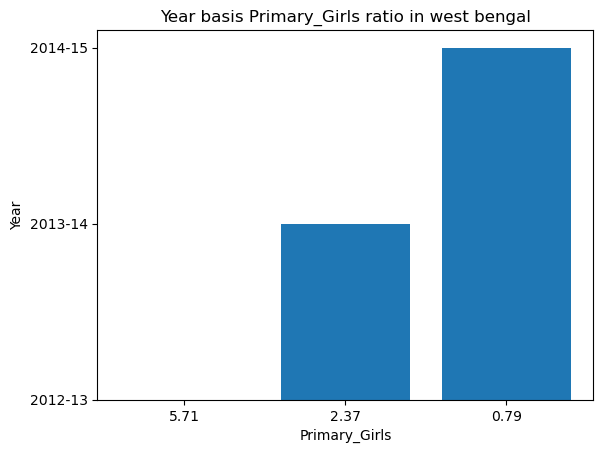

In [114]:
plt.bar(data_wb['Primary_Girls'],data_wb['year'] )
plt.xlabel('Primary_Girls')
plt.ylabel('Year')
plt.title('Year basis Primary_Girls ratio in west bengal')
plt.show()

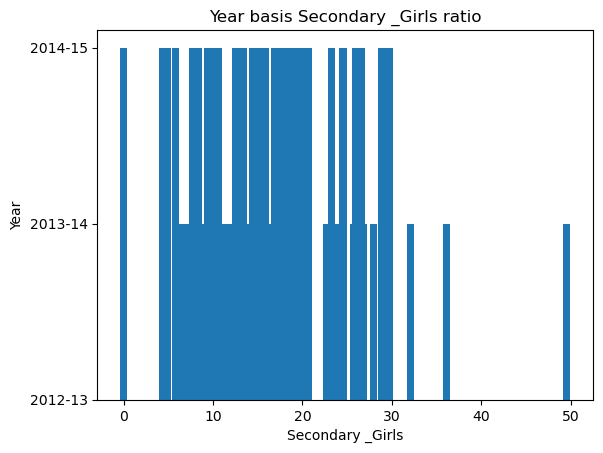

In [107]:
plt.bar(dropout_data['Secondary _Girls'],dropout_data['year'] )
plt.xlabel('Secondary _Girls')
plt.ylabel('Year')
plt.title('Year basis Secondary _Girls ratio')
plt.show()

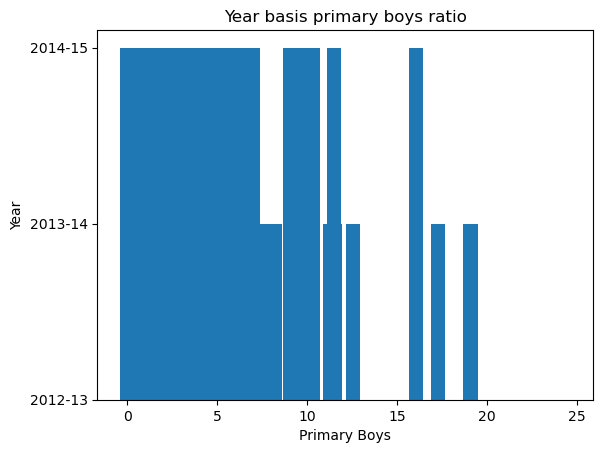

In [108]:
plt.bar(dropout_data['Primary_Boys'],dropout_data['year'] )
plt.xlabel('Primary Boys')
plt.ylabel('Year')
plt.title('Year basis primary boys ratio')
plt.show()

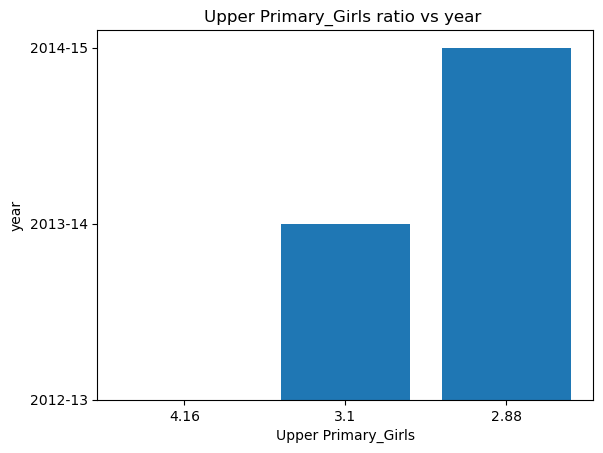

In [109]:
plt.bar(data_wb['Upper Primary_Girls'],data_wb['year'] )
plt.xlabel('Upper Primary_Girls')
plt.ylabel('year')
plt.title('Upper Primary_Girls ratio vs year ')
plt.show()

(array([52., 25., 18., 11.,  3.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.      ,  3.605   ,  7.21    , 10.815   , 14.42    , 18.025   ,
        21.63    , 25.234999, 28.84    , 32.445   , 36.05    ],
       dtype=float32),
 <BarContainer object of 10 artists>)

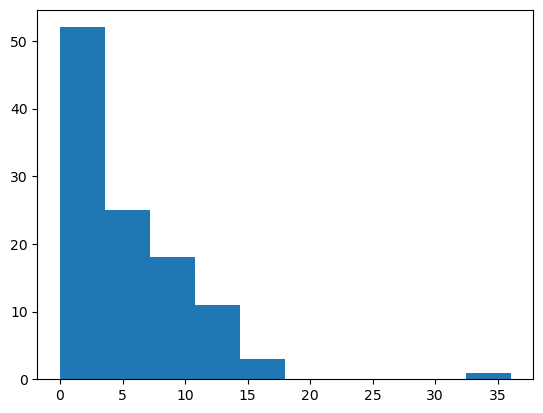

In [111]:
plt.hist(dropout_data['HrSecondary_Girls'])

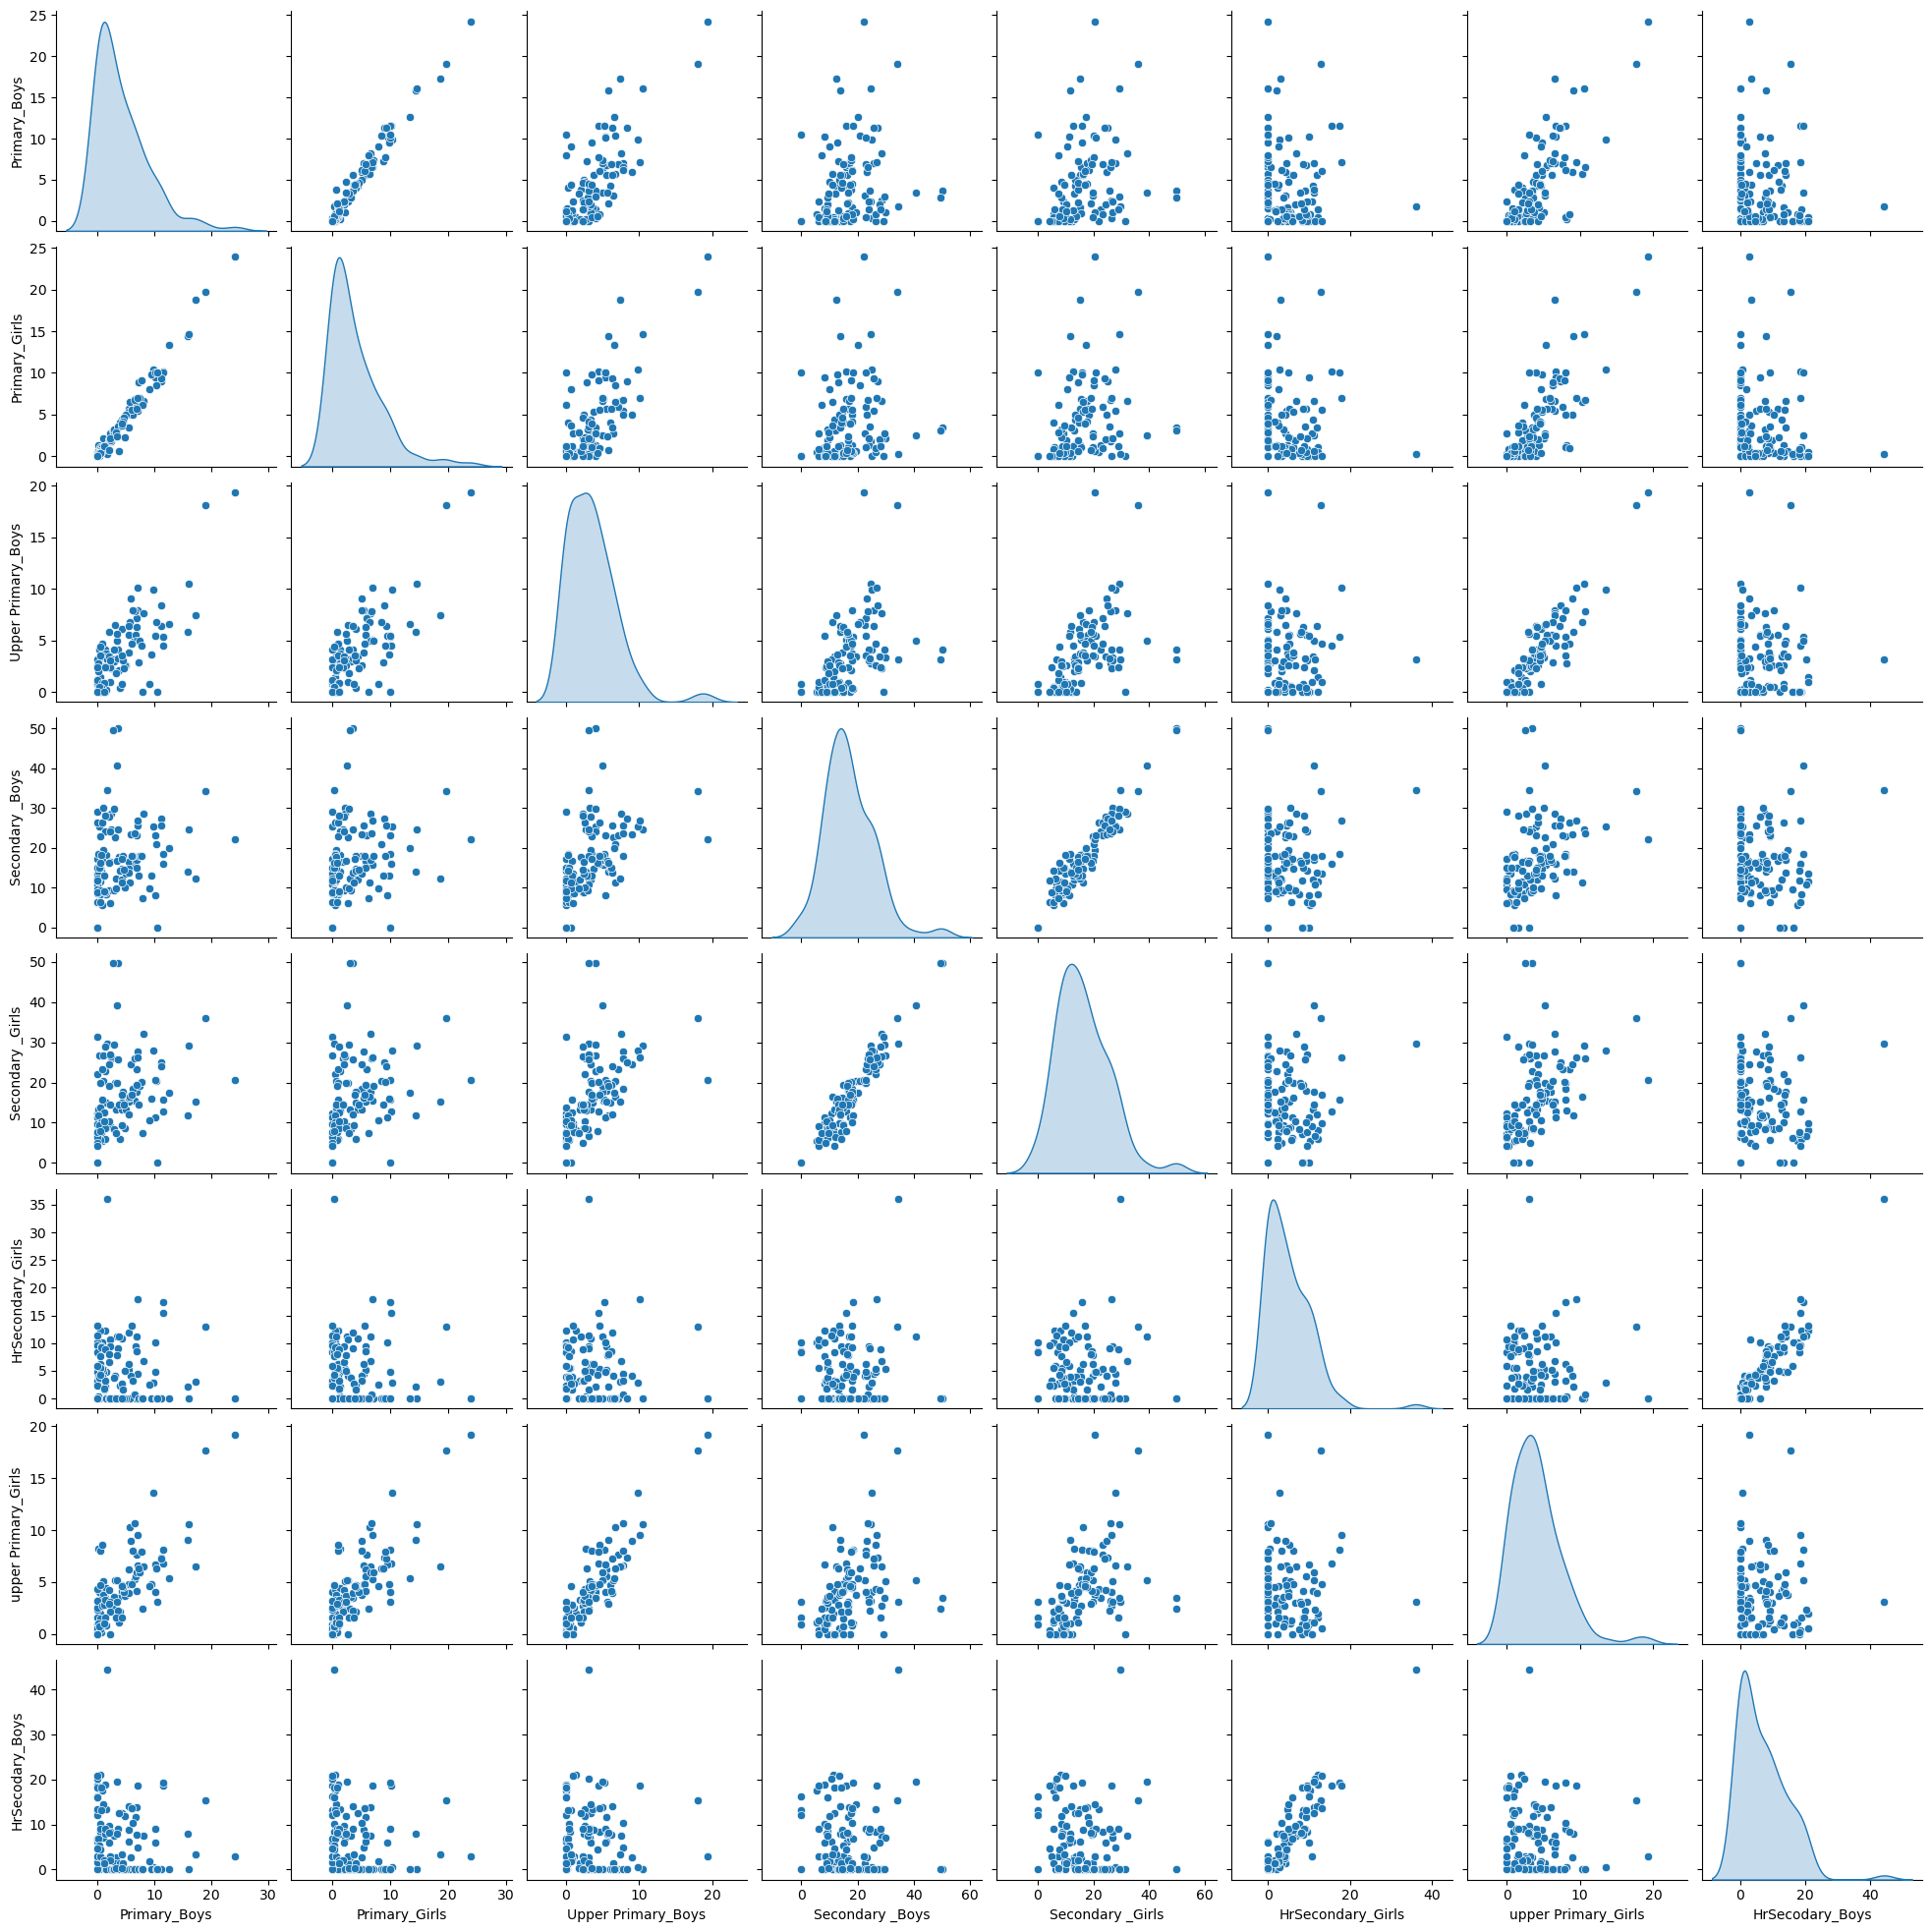

In [112]:
sns.pairplot(dropout_data,diag_kind='kde')